# Data Visualisations

In [62]:
# import libraries 

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb 
import numpy as np

In [12]:
# load data in 

rona_df = pd.read_csv("Mexican Data/covid.csv")

In [13]:
rona_df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


## Visualisation ideas 

- Date range between symptoms and death 
- How many are intubated 
- How many are intubated x other factors 
- Affect of Obesity
- % of deaths for Immunosuppression
- Date range of inpatients - admissions
- Inpatient to outpatient comparison per week + line of total cases per week 

### Count of intubated 

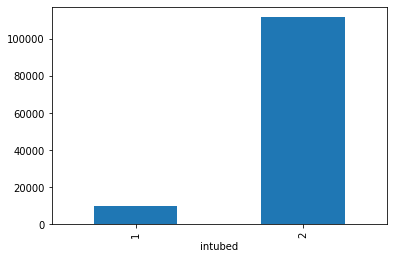

In [37]:
known_intubed = rona_df[rona_df.intubed < 97]
known_intubed.groupby('intubed').id.count().plot.bar(ylim=0)
plt.show()

### Intubation x Other Lung Factors


In [71]:
intubation_vs_other = rona_df[['id', 'intubed', 'pneumonia','copd','asthma','tobacco']]
intubation_vs_other.head()

,id,intubed,pneumonia,copd,asthma,tobacco
0,16169f,97,2,2,2,2
1,1009bf,97,2,2,2,2
2,167386,2,2,2,2,2
3,0b5948,2,1,2,2,2
4,0d01b5,2,2,2,2,2


In [72]:
intubation_vs_other = intubation_vs_other.replace(97, np.nan)
intubation_vs_other = intubation_vs_other.replace(98, np.nan)
intubation_vs_other = intubation_vs_other.replace(99, np.nan)
intubation_vs_other = intubation_vs_other.dropna(axis=0)

In [73]:
intubation_vs_other.head()


,id,intubed,pneumonia,copd,asthma,tobacco
2,167386,2.0,2.0,2.0,2.0,2.0
3,0b5948,2.0,1.0,2.0,2.0,2.0
4,0d01b5,2.0,2.0,2.0,2.0,2.0
5,1beec8,2.0,1.0,2.0,2.0,2.0
6,1.75E+56,2.0,2.0,2.0,2.0,2.0


In [82]:
intubed_true = intubation_vs_other.loc[intubation_vs_other['intubed'] == 1]

In [83]:
intubed_true.head()

,id,intubed,pneumonia,copd,asthma,tobacco
9,006b91,1.0,1.0,2.0,2.0,2.0
50,03f45a,1.0,1.0,2.0,2.0,1.0
79,1d5df2,1.0,1.0,2.0,2.0,2.0
92,077c96,1.0,1.0,2.0,2.0,2.0
97,03877c,1.0,1.0,2.0,2.0,2.0
